# Excercise 2: Detect Outliers using Percentile


In [2]:
#Import modules
import pandas as panda
import matplotlib
from matplotlib import pyplot as plot


### We will  use bnb dataset 
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/data

In [3]:
dataframe = panda.read_csv("BNB_NYC.csv")
dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
dataframe.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19678,15765350,Doorman 2 Bed GYM DECK 5212,16098958,Jeremy & Laura,Manhattan,Murray Hill,40.74437,-73.97295,Entire home/apt,190,30,4,2019-01-14,0.13,96,331
27574,21695845,Sunny West Village Studio Apartment,10974696,Shae,Manhattan,West Village,40.73057,-74.00458,Entire home/apt,199,3,16,2019-05-07,0.81,1,3
40610,31493796,Artists House with fire place & roof garden!,18007776,Tyler,Brooklyn,Prospect-Lefferts Gardens,40.65621,-73.95620,Private room,40,3,5,2019-06-22,1.03,4,0
28459,22079387,Boutique Luxury in the Heart of Chelsea,148107543,Mario,Manhattan,Chelsea,40.74494,-73.99762,Entire home/apt,299,2,30,2019-05-25,1.57,1,274
48556,36315267,"Great Soho Apartment "" Renovated & Clean """,138379336,Karin,Manhattan,SoHo,40.72654,-74.00201,Entire home/apt,285,5,0,NaN,NaN,1,365
28076,21924586,Entire 2 bedroom top floor in Clinton Hill,2930303,Rocio,Brooklyn,Bedford-Stuyvesant,40.68537,-73.95894,Entire home/apt,100,28,2,2018-02-05,0.11,1,177
8236,6345728,Dwtn 1 Bedroom W/Spectacular Views,13275837,Jaime,Manhattan,Greenwich Village,40.73109,-73.99411,Entire home/apt,190,3,7,2017-04-10,0.15,1,0
12654,9712126,••BEST Manhattan Downtown Location!••,9339714,Jessica,Manhattan,Gramercy,40.73304,-73.98430,Entire home/apt,140,3,103,2019-06-24,2.46,2,270
37461,29729728,Apartment in the heart of Williamsburg,2299134,Maya,Brooklyn,Williamsburg,40.72034,-73.95626,Entire home/apt,100,3,2,2019-04-26,0.40,1,2
2807,1560339,Entire Modern Studio Apartment/Prime Location,3038687,Karen,Manhattan,Upper West Side,40.78981,-73.97518,Entire home/apt,104,30,27,2019-05-31,0.38,8,137


In [5]:
# No of records and columns within dataset
dataframe.shape

(48895, 16)

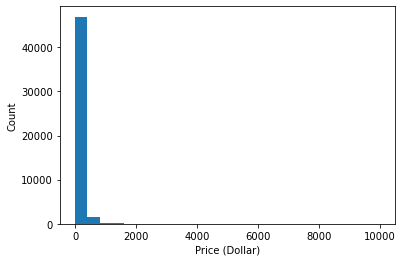

In [6]:
# Data distrubution with Histogram
plot.hist(dataframe.price, bins=25, rwidth=1)
plot.xlabel('Price (Dollar)')
plot.ylabel('Count')
plot.show()

In [8]:
# Price Column with mean,standard deviation and other insights 
dataframe.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [9]:
# Detect outliers using percentile and using quantile function
lower_limit, upper_limit = dataframe.price.quantile([0.01,0.999])
lower_limit, upper_limit

(30.0, 3000.0)

In [10]:
dataframe[dataframe.price<lower_limit]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,2019-05-26,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,2014-10-20,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,NaN,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,2019-06-19,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,2019-06-06,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,2019-07-07,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,NaN,NaN,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,NaN,NaN,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,NaN,NaN,6,338


In [14]:
dataframe[dataframe.price>upper_limit]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,NaN,NaN,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,2013-09-28,0.03,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,NaN,NaN,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,NaN,NaN,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,NaN,NaN,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365


### Remove outliers


In [11]:
new_dataframe = dataframe[(dataframe.price>lower_limit)&(dataframe.price<upper_limit)]
new_dataframe.shape

(48183, 16)

**Above shows original dataframe data 48895 data points. Out of that we removed 712 outliers (i.e. 48895-48183)**



In [13]:
new_dataframe

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
